In [1]:
from numpy.lib.format import open_memmap
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [ ]:
hoo_path = 'test_TRAK_hoo.mmap' # jyh: your path here
val_path = 'test_TRAK_val.mmap' # jyh: your path here

In [ ]:
_scores_val = open_memmap('test_TRAK_val.mmap')
_scores_hoo = open_memmap('test_TRAK_hoo.mmap')

In [ ]:
def get_raw(scores):
    values = []
    for i in range(len(scores)):
        sc = scores[i]
        for j in range(len(sc)):
            values.append(sc[j])
    return values

In [ ]:
_scores_val.shape

(29227, 6263)

In [ ]:
val_scores_raw = get_raw(_scores_val)
hoo_scores_raw = get_raw(_scores_hoo)

In [ ]:
_scores_val[0].shape

(6263,)

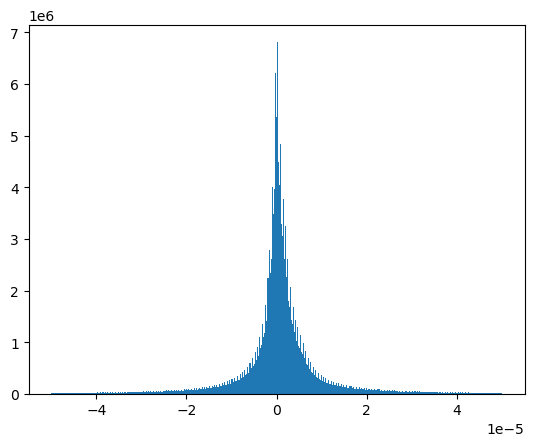

In [ ]:
plt.hist(val_scores_raw,bins=500,range = (-.00005,.00005));

In [ ]:
plt.hist(val_scores_raw)

In [ ]:
np.std(val_scores_raw)

0.007473

In [ ]:
np.mean(hoo_scores_raw)


0.000967

In [ ]:
sum(hoo_scores_raw)/len(hoo_scores_raw)

0.0009669220227266294

In [ ]:
# np.std() outputs inf for hoo_scores_raw; don't know why

def calculate_standard_deviation(data):
    # Calculate the mean (average) of the data
    mean = sum(data) / len(data)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data]

    # Calculate the variance (average of squared differences)
    variance = sum(squared_diff) / len(data)

    # Calculate the standard deviation (square root of the variance)
    standard_deviation = math.sqrt(variance)

    return mean, standard_deviation

In [ ]:
calculate_standard_deviation(hoo_scores_raw)

0.017690595432967495

In [ ]:
calculate_standard_deviation(val_scores_raw)

(0.00030525210531979515, 0.007527707943874181)

In [ ]:
def get_mean(scores):
    means = []
    for i in range(len(scores)):
        vector = scores[i]
        means.append(np.mean(vector))
    return means

In [ ]:
val_means = get_mean(_scores_val)
hoo_means = get_mean(_scores_hoo)

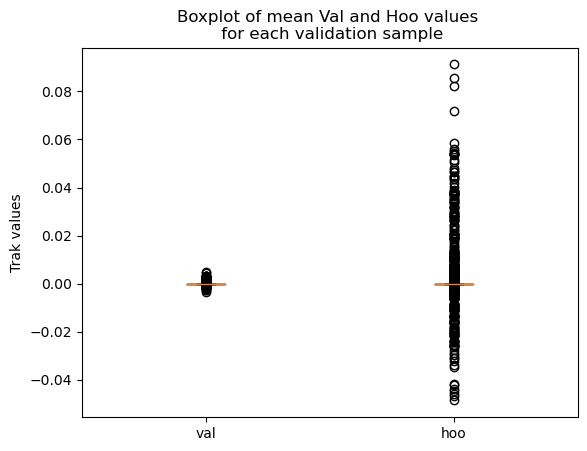

In [ ]:
data_to_plot = [val_means, hoo_means]

# Create a box plot
plt.boxplot(data_to_plot)

# Customize the plot (optional)
plt.title(f'Boxplot of mean Val and Hoo values \n for each validation sample')
plt.xticks([1, 2], ['val', 'hoo'])
plt.ylabel('Trak values')

# Show the plot
plt.show()

In [ ]:
# there seems to be some negative values here. Is that ok?
# _scores_val[_scores_val < 0] = 0
# _scores_hoo[_scores_hoo < 0] = 0
_scores_val[_scores_val < 0] = np.abs(_scores_val[_scores_val < 0])
_scores_hoo[_scores_hoo < 0] = np.abs(_scores_hoo[_scores_hoo < 0])

# UPDATE 11/27: Don't change the negative values

In [ ]:
def kl_divergence(p, q):
    # return np.sum(p[i] * np.log(p[i]/q[i]) for i in range(len(p)))
    return entropy(p,q)

In [ ]:
target_size = 29227

In [ ]:
base_uniform = [1/target_size]*target_size
np.sum(base_uniform)

1.0000000000000002

In [ ]:
_scores_val = _scores_val.T
_scores_hoo = _scores_hoo.T

In [ ]:
kl_divergence(_scores_val[62],base_uniform)

4.027825842667282

In [ ]:
def nm(vector):
    min_val = np.min(vector)
    max_val = np.max(vector)
    normalized_vector = (vector - min_val) / (max_val - min_val)
    return normalized_vector

In [ ]:
def get_divergence(scores, base_distribution):
    metrics = []
    for i in range(len(scores)):
        vector = scores[i]
        divergence = kl_divergence(sorted(nm(vector)),base_distribution)
        metrics.append(divergence)
    return metrics

In [ ]:
val_div = get_divergence(_scores_val,base_uniform)
hoo_div = get_divergence(_scores_hoo,base_uniform)

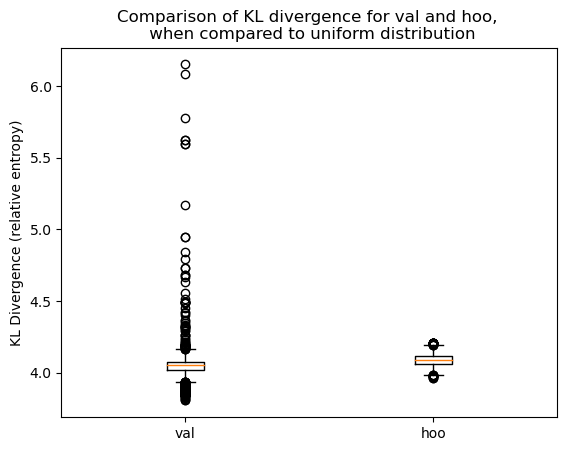

In [ ]:
# Example data (replace these with your own lists)

# Create a list of data for the box plot
data_to_plot = [val_div, hoo_div]

# Create a box plot
plt.boxplot(data_to_plot)

# Customize the plot (optional)
plt.title('Comparison of KL divergence for val and hoo, \n when compared to uniform distribution')
plt.xticks([1, 2], ['val', 'hoo'])
plt.ylabel('KL Divergence (relative entropy)')

# Show the plot
plt.show()

In [ ]:
def p_sum(values,percentile):
    sorted_values = sorted(values, reverse=True)

    # Calculate the index that corresponds to the top 20 percent
    top_20_percent_index = int(percentile * len(sorted_values))

    # Take the top 20 percent of values
    top_20_percent_values = sorted_values[:top_20_percent_index]

    # Calculate the total sum of the list
    total_sum = sum(values)

    # Calculate the sum of the top 20 percent of values
    top_20_percent_sum = sum(top_20_percent_values)

    # Calculate the percentage of the total sum accounted for by the top 20 percent
    percentage_accounted_for = (top_20_percent_sum / total_sum) * 100

    print(f"Percentage accounted for by top {percentile*100} percent:", percentage_accounted_for)

    return percentage_accounted_for

In [ ]:
# TODO: Set random seeds for different percentage thresholds we want to compare our results to

In [ ]:
import math

alpha_p = math.log(5) / math.log(9)
pareto_values = np.random.pareto(alpha_p,29227)
percentile = 0.01
pareto_p = p_sum(pareto_values,percentile)

Percentage accounted for by top 1.0 percent: 93.03029033178318


In [ ]:
p_sum(_scores_val[0],percentile)

Percentage accounted for by top 1.0 percent: 83.09599933806423


83.09599933806423

In [ ]:
entropy(sorted(_scores_val[0]),sorted(nm(pareto_values)))

0.9480901949273014

In [ ]:
pareto_base = sorted(nm(pareto_values))
val_div_pareto = get_divergence(_scores_val,sorted(pareto_base))
hoo_div_pareto = get_divergence(_scores_hoo,sorted(pareto_base))

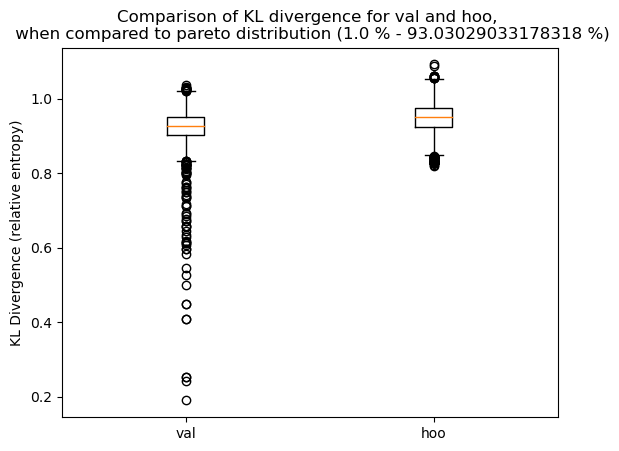

In [ ]:
data_to_plot = [val_div_pareto, hoo_div_pareto]

# Create a box plot
plt.boxplot(data_to_plot)

# Customize the plot (optional)
plt.title(f'Comparison of KL divergence for val and hoo, \n when compared to pareto distribution ({percentile*100} % - {pareto_p} %)')
plt.xticks([1, 2], ['val', 'hoo'])
plt.ylabel('KL Divergence (relative entropy)')

# Show the plot
plt.show()